In [14]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras

In [15]:
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [16]:
len(x_train),len(x_test)

(60000, 10000)

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
x_train[0].shape

(28, 28)

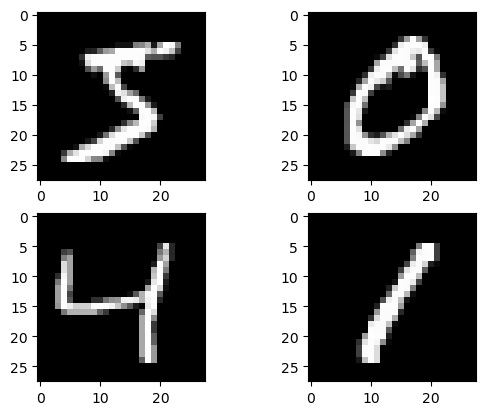

In [20]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train[0].shape

(28, 28)

In [26]:

x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [27]:
input_shape=(28,28,1)

In [28]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [29]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [30]:
x_train/=255
x_test/=255

In [31]:
batch_size=128
num_classes=10
epochs=10

In [32]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
469/469 [==============================] - 33s 67ms/step - loss: 0.3987 - accuracy: 0.8753 - val_loss: 0.0660 - val_accuracy: 0.9810
Epoch 2/10
469/469 [==============================] - 31s 66ms/step - loss: 0.1048 - accuracy: 0.9732 - val_loss: 0.0402 - val_accuracy: 0.9873
Epoch 3/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0762 - accuracy: 0.9801 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 4/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0587 - accuracy: 0.9851 - val_loss: 0.0284 - val_accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0466 - accuracy: 0.9877 - val_loss: 0.0329 - val_accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0408 - accuracy: 0.9894 - val_loss: 0.0262 - val_accuracy: 0.9933
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0350 - accuracy: 0.9911 - val_loss: 0.0253 - val_accuracy:

In [34]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('loss=',scores[0])
print('Accurracy=',scores[1])

loss= 0.02419455349445343
Accurracy= 0.9929999709129333


In [35]:
y_predict = model.predict(x_test)
y_predict[0]

313/313 [==============================] - 2s 6ms/step


array([5.3063924e-20, 6.8630184e-15, 9.5606986e-13, 1.7163225e-15,
       1.5071925e-13, 1.5563741e-17, 6.8677609e-22, 9.9999994e-01,
       2.3024531e-18, 2.4233872e-11], dtype=float32)

In [36]:
x_test[0].shape

(28, 28, 1)

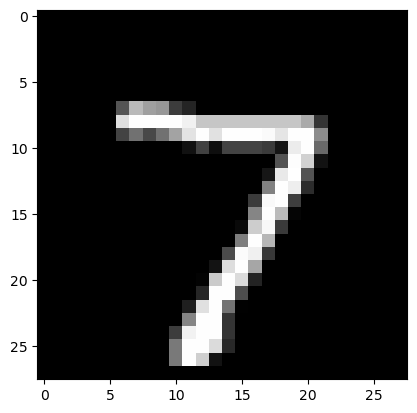

In [37]:
plt.imshow(x_test[0].reshape(28,28,1),cmap=plt.get_cmap('gray'))

In [38]:
np.argmax(y_predict[0])

7

In [39]:
from keras.models import load_model

model.save('digit.h5')  # Save the model to a file


1/1 [==============================] - 0s 25ms/step


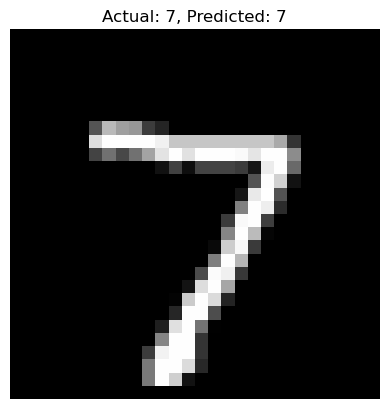

1/1 [==============================] - 0s 22ms/step


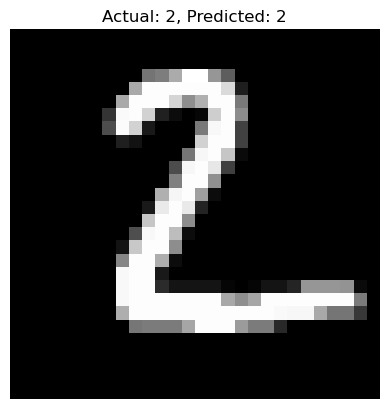

1/1 [==============================] - 0s 21ms/step


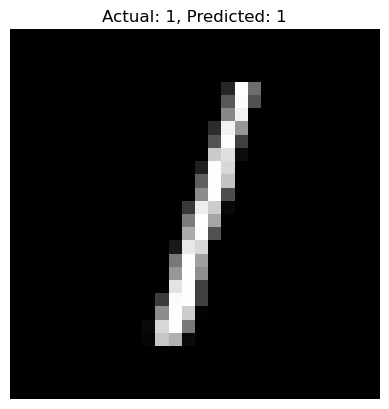

1/1 [==============================] - 0s 22ms/step


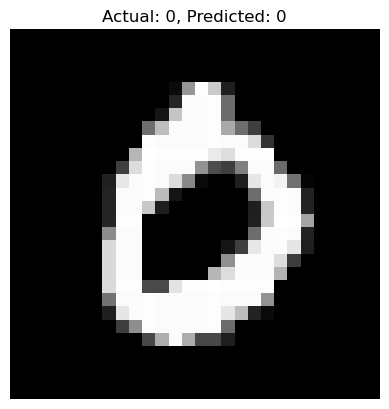

1/1 [==============================] - 0s 22ms/step


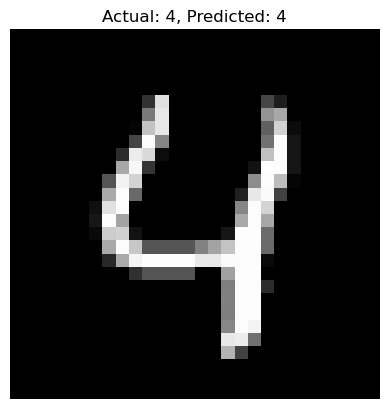

1/1 [==============================] - 0s 22ms/step


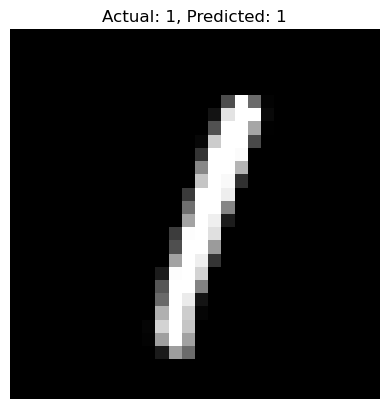

1/1 [==============================] - 0s 22ms/step


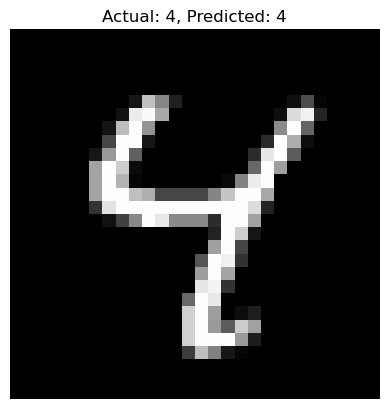

1/1 [==============================] - 0s 23ms/step


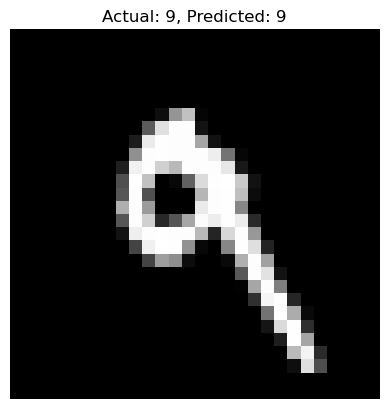

1/1 [==============================] - 0s 21ms/step


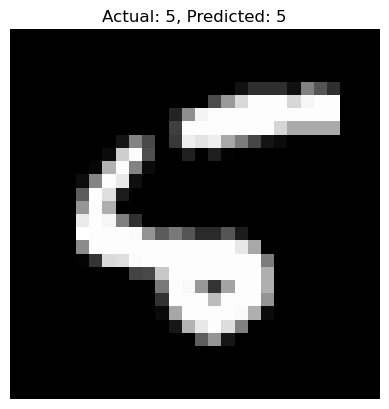

1/1 [==============================] - 0s 23ms/step


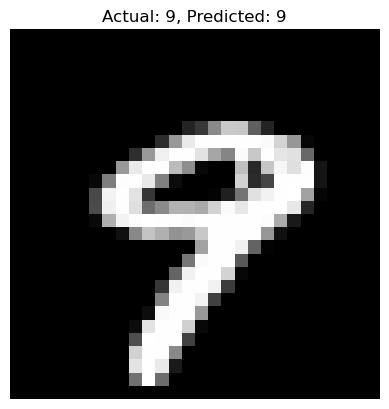

In [49]:
for idx in range(10):
    image = x_test[idx]
    actual_label = np.argmax(y_test[idx])
    
    # Reshape the image to match the model's input shape
    image = image.reshape(1, 28, 28, 1)
    
    # Predict the label using the model
    predicted_probs = model.predict(image)
    predicted_label = np.argmax(predicted_probs)
    
    # Display the actual and predicted labels along with the image
    plt.figure()
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [50]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('digit.h5')  # Provide the path to your trained model file

def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Load and convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28
    image = np.array(image) / 255.0  # Convert to numpy array and normalize
    image = image.reshape(1, 28, 28, 1)  # Reshape for the model's input shape
    return image

def predict_digit(image_path):
    image = preprocess_image(image_path)

    # Make a prediction using the trained model
    predicted_probs = model.predict(image)
    predicted_digit = np.argmax(predicted_probs)
    
    return predicted_digit

# Test the prediction function with a new image
new_image_path = '/kaggle/input/mnistimage/2.png'  # Provide the path to your new image
predicted_digit = predict_digit(new_image_path)
print(f"Predicted digit: {predicted_digit}")



1/1 [==============================] - 0s 88ms/step
Predicted digit: 2
